In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA,  FactorAnalysis
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
from tqdm import tqdm
from google.colab import drive
from PIL import Image

from scipy import linalg

from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!cp /content/drive/Shareddrives/ML_Group129/src/SVM/pre_data/pre.py .
!cp /content/drive/Shareddrives/ML_Group129/src/SVM/pre_data/pca.py .

In [ ]:
!unzip /content/drive/Shareddrives/ML_Group129/src/data.zip > /dev/null

replace data/README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
import pca
import pre_processing
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Apr  1 15:25:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
df = pre.getData()
df = df.loc[(df["is_validation"] == 0) & (df["is_final_validation"] == 0)]
df = df.loc[(df['label'] == 'bee') | (df['label'] == 'bee')]

100%|██████████| 11421/11421 [00:06<00:00, 1633.50it/s]


In [ ]:
def rgb_split(img):
  blue,green,red = cv2.split(img)
  return blue/255, green/255, red/255



In [ ]:
def pca_model(colour):
  model = PCA(n_components=80)
  model_list = list()
  model_list.append(model.fit(colour))
  model_list.append(model_list[0].transform(colour))
  return model_list



In [ ]:
def pca(img):
    blue, green, red = rgb_split(img)

    blue_model= pca_model(blue)
    green_model= pca_model(green)
    red_model= pca_model(red)
    
    img_reduced= (cv2.merge((blue_model[0].inverse_transform(blue_model[1]),
                            green_model[0].inverse_transform(green_model[1]),
                           red_model[0].inverse_transform(red_model[1]))))
    return img_reduced
  


In [ ]:
dir = '/content/drive/Shareddrives/ML_Group129/src/SVM/pcaData/'

A) Show Image

bee


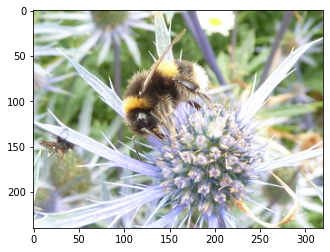

In [ ]:
test_img = df.iloc[300]
path = test_img['path']
print(test_img['label'])
img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = cv2.resize(img, (256, 256))
plt.show()

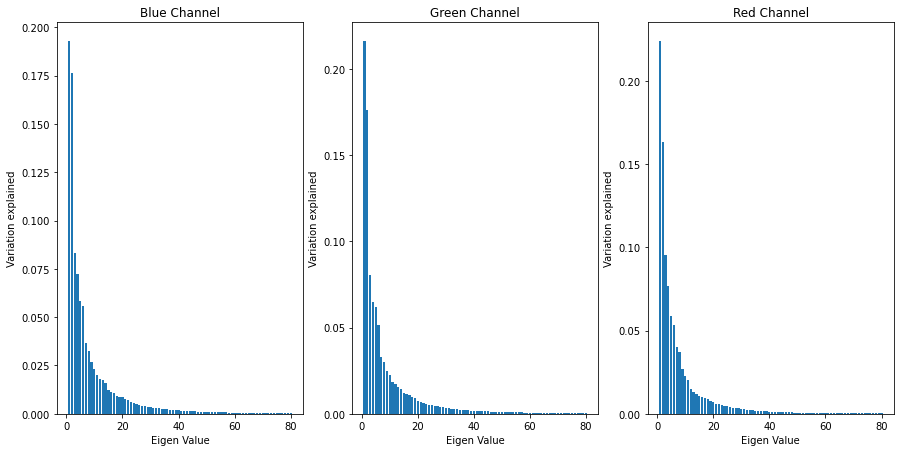

In [ ]:
blue, green, red = rgb_split(img)

blue_model= pca_model(blue)
green_model= pca_model(green)
red_model= pca_model(red)



fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue")
plt.ylabel('Var_ val')
plt.xlabel('Eigen_val')
plt.bar(list(range(1,81)),blue_model[0].explained_variance_ratio_)

fig.add_subplot(132)
plt.title("Green")
plt.ylabel('Var_val')
plt.xlabel('Eigen val')
plt.bar(list(range(1,81)),green_model[0].explained_variance_ratio_)

fig.add_subplot(133)
plt.title("Red")
plt.ylabel('Var_val')
plt.xlabel('Eigen Val')
plt.bar(list(range(1,81)),red_model[0].explained_variance_ratio_)
plt.show()

In [ ]:
blue_var = []
green_var = []
red_var = []

for index, img in tqdm(df.iterrows()):
    path = img['path']
    img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (250, 250))

    blue, green, red = rgb_split(img)

    blue_model= pca_model(blue)
    green_model= pca_model(green)
    red_model= pca_model(red)

    blue_var.append(sum(blue_model[0].explained_variance_ratio_))
    green_var.append(sum(green_model[0].explained_variance_ratio_))
    red_var.append(sum(red_model[0].explained_variance_ratio_))
    



2195it [03:35, 10.19it/s]


In [ ]:
df_valid = pd.DataFrame(
    {'blue': blue_var,
     'green': green_var,
     'red': red_var
    })

In [ ]:
len(df_valid)

2195

In [ ]:
df_valid.head(5)

blue     green       red
0  0.999586  0.999393  0.999532
1  0.998869  0.999462  0.998570
2  0.999329  0.999273  0.999617
3  0.999757  0.999775  0.999709
4  0.999345  0.997369  0.999346

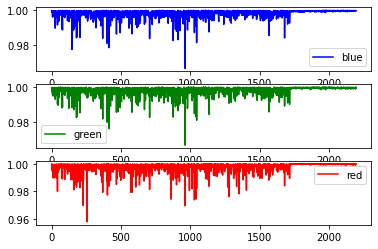

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1)
df_valid.plot( y= [ "blue"], color = ['b'], ax = axes[0] )
df_valid.plot( y= [ "green"], color = ['g'], ax = axes[1] )
df_valid.plot( y= [ "red"], color = ['r'], ax = axes[2] )

In [ ]:
min(red_var)

0.9577107477102546